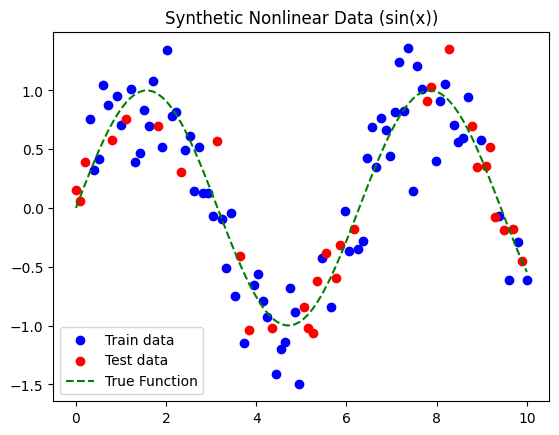

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1️. Generate nonlinear data
np.random.seed(42)
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true = np.sin(X).ravel()
y = y_true + np.random.normal(0, 0.3, size=n_samples)  # add noise

# Manual train-test split (70% train, 30% test)
split = int(0.7 * n_samples)
indices = np.random.permutation(n_samples)
train_idx, test_idx = indices[:split], indices[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X, y_true, color='green', linestyle='--', label='True Function')
plt.title("Synthetic Nonlinear Data (sin(x))")
plt.legend()
plt.show()


In [5]:
# 2️. Manual helper functions

def polynomial_features(X, degree):
    """Manually generate polynomial features up to given degree."""
    n = X.shape[0]
    X_poly = np.ones((n, degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X[:, 0] ** d
    return X_poly

def linear_regression_fit(X, y):
    """Fit linear regression using Normal Equation."""
    # θ = (XᵀX)⁻¹ Xᵀy
    XTX_inv = np.linalg.inv(X.T.dot(X))
    theta = XTX_inv.dot(X.T).dot(y)
    return theta

def predict(X, theta):
    return X.dot(theta)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


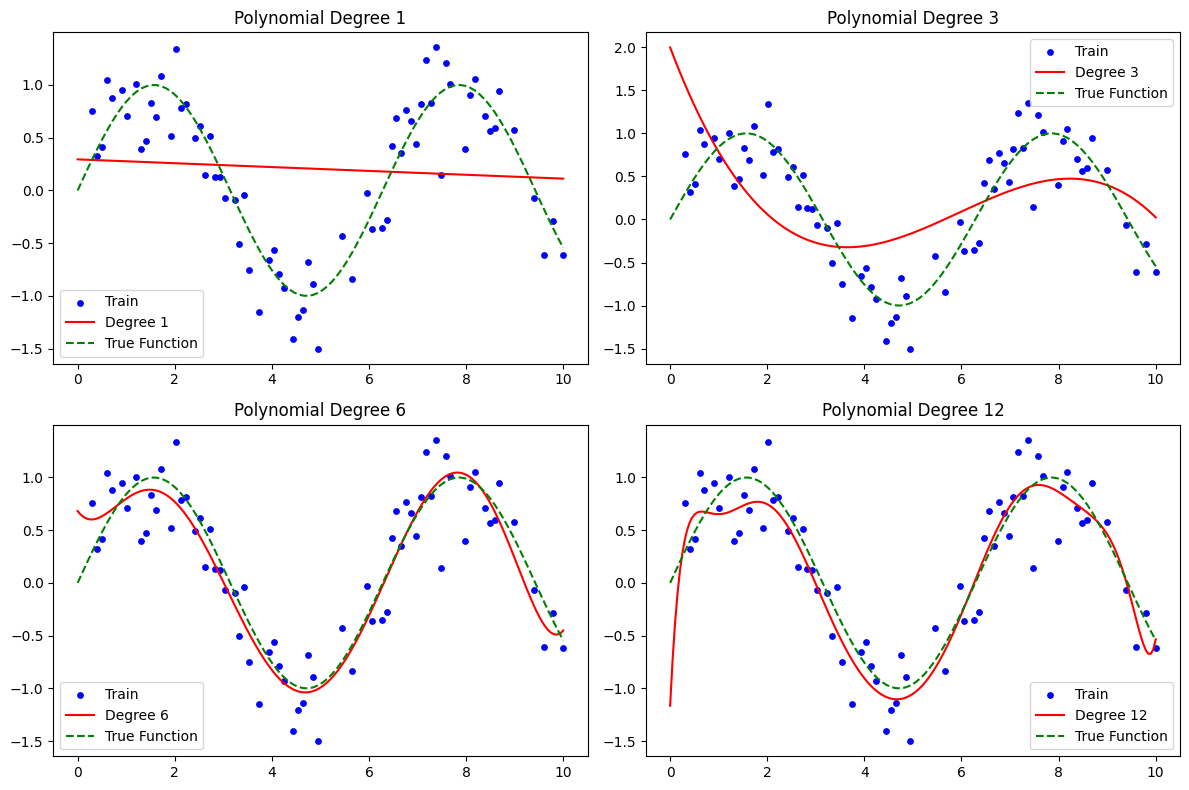

In [7]:
# 3️. Fit polynomial regression for multiple degrees and record errors

degrees = [1, 3, 6, 12]
train_errors = []
test_errors = []

plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees, 1):
    # Manually create polynomial features
    X_poly_train = polynomial_features(X_train, degree)
    X_poly_test = polynomial_features(X_test, degree)

    # Fit manually
    theta = linear_regression_fit(X_poly_train, y_train)

    # Predict
    y_pred_train = predict(X_poly_train, theta)
    y_pred_test = predict(X_poly_test, theta)

    # Errors
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Visualization
    plt.subplot(2, 2, i)
    X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
    X_plot_poly = polynomial_features(X_plot, degree)
    y_plot = predict(X_plot_poly, theta)
    plt.scatter(X_train, y_train, color='blue', s=15, label='Train')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.plot(X, y_true, color='green', linestyle='--', label='True Function')
    plt.title(f"Polynomial Degree {degree}")
    plt.legend()

plt.tight_layout()
plt.show()


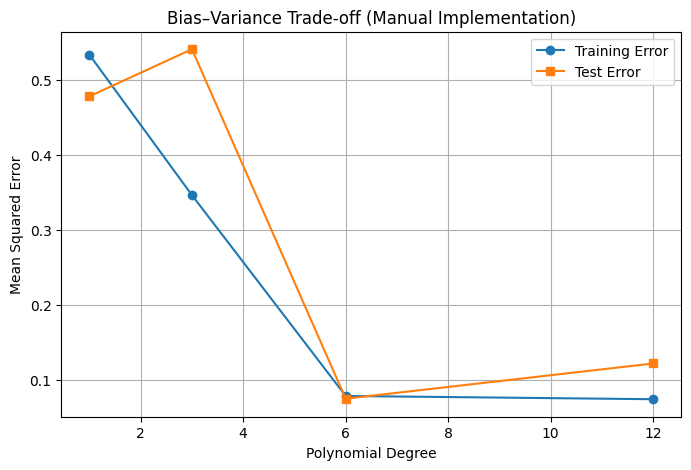

Training Errors: [0.5333 0.3465 0.0791 0.0747]
Testing Errors : [0.4781 0.5408 0.0754 0.1223]


In [9]:
# 4️. Plot bias-variance tradeoff
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, test_errors, marker='s', label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Trade-off (Manual Implementation)")
plt.legend()
plt.grid(True)
plt.show()

print("Training Errors:", np.round(train_errors, 4))
print("Testing Errors :", np.round(test_errors, 4))


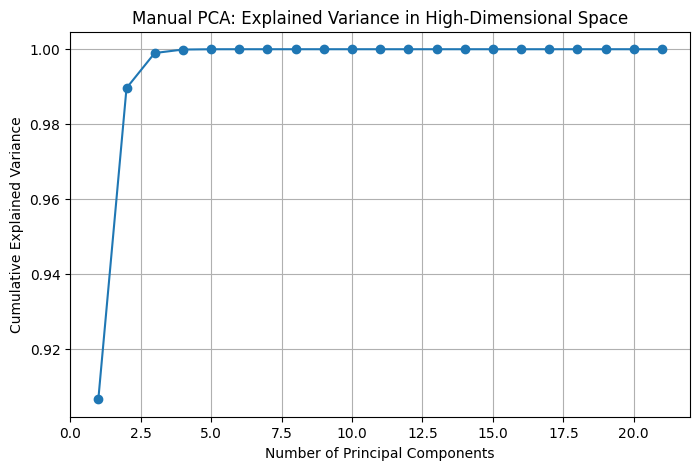

To retain 95% variance, we need 2 components out of 21


In [11]:
# 5️. Manual PCA Implementation on High-Dimensional Polynomial Data

# Create high-degree polynomial features
degree_high = 20
X_poly_high = polynomial_features(X, degree_high)

# Standardize manually
mean = X_poly_high.mean(axis=0)
std = X_poly_high.std(axis=0) + 1e-12
X_scaled = (X_poly_high - mean) / std

# Manual PCA using SVD
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)
explained_variance = (S ** 2) / np.sum(S ** 2)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Manual PCA: Explained Variance in High-Dimensional Space")
plt.grid(True)
plt.show()

# Find number of components to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"To retain 95% variance, we need {n_components_95} components out of {X_poly_high.shape[1]}")
